In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/all_train.csv.gz', compression='gzip')

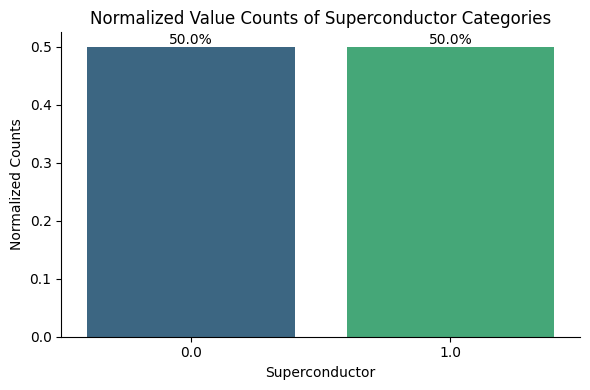

In [13]:
# Look at the targets distribution
target_dt=data["# label"].value_counts(normalize=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_dt.index, y=target_dt.values, palette="viridis")
plt.xlabel("Superconductor")
plt.ylabel("Normalized Counts")
plt.title("Normalized Value Counts of Superconductor Categories")
sns.despine()
ax.yaxis.grid(False)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [14]:
#Split Data
from sklearn.model_selection import train_test_split
y=data['# label']
x=data.drop('# label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
#Scale Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model time

> 2 Dense layers with 1000 Epochs! and 500 batch_size

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [ ]:
model_sc=tf.keras.Sequential()
model_sc.add(layers.Dense(100,activation='tanh'))
model_sc.add(layers.Dropout(.3))
model_sc.add(layers.Dense(1,activation='sigmoid'))

model_sc.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

In [ ]:
#Stopped half an hour later since accuracy was barely improving from 36-66
model_sc.fit(X_train, y_train, epochs=1000, batch_size=500, verbose=2)

Epoch 1/1000
9800/9800 - 31s - loss: 0.3317 - accuracy: 0.8453 - 31s/epoch - 3ms/step
Epoch 2/1000
9800/9800 - 33s - loss: 0.3110 - accuracy: 0.8543 - 33s/epoch - 3ms/step
Epoch 3/1000
9800/9800 - 25s - loss: 0.3074 - accuracy: 0.8560 - 25s/epoch - 3ms/step
Epoch 4/1000
9800/9800 - 32s - loss: 0.3057 - accuracy: 0.8568 - 32s/epoch - 3ms/step
Epoch 5/1000
9800/9800 - 24s - loss: 0.3044 - accuracy: 0.8577 - 24s/epoch - 2ms/step
Epoch 6/1000
9800/9800 - 28s - loss: 0.3034 - accuracy: 0.8581 - 28s/epoch - 3ms/step
Epoch 7/1000
9800/9800 - 28s - loss: 0.3029 - accuracy: 0.8584 - 28s/epoch - 3ms/step
Epoch 8/1000
9800/9800 - 26s - loss: 0.3024 - accuracy: 0.8587 - 26s/epoch - 3ms/step
Epoch 9/1000
9800/9800 - 27s - loss: 0.3020 - accuracy: 0.8588 - 27s/epoch - 3ms/step
Epoch 10/1000
9800/9800 - 30s - loss: 0.3018 - accuracy: 0.8589 - 30s/epoch - 3ms/step
Epoch 11/1000
9800/9800 - 34s - loss: 0.3017 - accuracy: 0.8591 - 34s/epoch - 3ms/step
Epoch 12/1000
9800/9800 - 28s - loss: 0.3014 - accur

KeyboardInterrupt: ignored

In [ ]:
y_pred = model_sc.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)


65625/65625 [==============================] - 111s 2ms/step


In [ ]:
accuracy

0.8679138095238095

> Providing validation data to stop early lower batch size

In [ ]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.90, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
safety=EarlyStopping(monitor="val_loss",patience=1,min_delta=0.001,mode='auto',restore_best_weights=True)

model_scStopEarly=tf.keras.Sequential()
model_scStopEarly.add(layers.Dense(100,activation='tanh'))
model_scStopEarly.add(layers.Dropout(.3))
model_scStopEarly.add(layers.Dense(1,activation='sigmoid'))

model_scStopEarly.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_scStopEarly.fit(X_train, y_train, epochs=1000, validation_data=(X_val,y_val),batch_size=20, callbacks=[safety])

Epoch 1/1000
245000/245000 [==============================] - 725s 3ms/step - loss: 0.3146 - accuracy: 0.8526 - val_loss: 0.3040 - val_accuracy: 0.8560
Epoch 2/1000
245000/245000 [==============================] - 708s 3ms/step - loss: 0.3059 - accuracy: 0.8570 - val_loss: 0.2966 - val_accuracy: 0.8621
Epoch 3/1000
245000/245000 [==============================] - 714s 3ms/step - loss: 0.3043 - accuracy: 0.8577 - val_loss: 0.2958 - val_accuracy: 0.8628


In [ ]:
y_pred = model_scStopEarly.predict(X_test_1)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test_1, y_pred_binary)


5907/5907 [==============================] - 11s 2ms/step


In [ ]:
accuracy

0.8660476190476191

> More dense layers

In [20]:
#Stopped at 84 epochs since scores were no increasing
model_sc_moreLayers=tf.keras.Sequential()
model_sc_moreLayers.add(layers.Dense(100,activation='tanh'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(50,activation='relu'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(30,activation='tanh'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_moreLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_moreLayers.fit(X_train, y_train, epochs=25, batch_size=500, verbose=2)

Epoch 1/25
9800/9800 - 32s - loss: 0.3152 - accuracy: 0.8538 - 32s/epoch - 3ms/step
Epoch 2/25
9800/9800 - 29s - loss: 0.3025 - accuracy: 0.8605 - 29s/epoch - 3ms/step
Epoch 3/25
9800/9800 - 29s - loss: 0.2992 - accuracy: 0.8626 - 29s/epoch - 3ms/step
Epoch 4/25
9800/9800 - 29s - loss: 0.2976 - accuracy: 0.8637 - 29s/epoch - 3ms/step
Epoch 5/25
9800/9800 - 29s - loss: 0.2964 - accuracy: 0.8644 - 29s/epoch - 3ms/step
Epoch 6/25
9800/9800 - 29s - loss: 0.2954 - accuracy: 0.8650 - 29s/epoch - 3ms/step
Epoch 7/25
9800/9800 - 29s - loss: 0.2950 - accuracy: 0.8654 - 29s/epoch - 3ms/step
Epoch 8/25
9800/9800 - 29s - loss: 0.2942 - accuracy: 0.8660 - 29s/epoch - 3ms/step
Epoch 9/25
9800/9800 - 29s - loss: 0.2939 - accuracy: 0.8662 - 29s/epoch - 3ms/step
Epoch 10/25
9800/9800 - 29s - loss: 0.2936 - accuracy: 0.8664 - 29s/epoch - 3ms/step
Epoch 11/25
9800/9800 - 30s - loss: 0.2930 - accuracy: 0.8668 - 30s/epoch - 3ms/step
Epoch 12/25
9800/9800 - 29s - loss: 0.2929 - accuracy: 0.8668 - 29s/epoch 

In [21]:
y_pred = model_sc_moreLayers.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)


65625/65625 [==============================] - 122s 2ms/step


In [22]:
accuracy

0.8739809523809524

# Bigger Batch_size of 1000

In [ ]:
model_sc_moreLayers=tf.keras.Sequential()
model_sc_moreLayers.add(layers.Dense(100,activation='relu'))
model_sc_moreLayers.add(layers.Dense(50,activation='relu'))
model_sc_moreLayers.add(layers.Dropout(.3))
model_sc_moreLayers.add(layers.Dense(30,activation='relu'))
model_sc_moreLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_moreLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_moreLayers.fit(X_train, y_train, epochs=25, batch_size=1000, verbose=2)

Epoch 1/25
4900/4900 - 22s - loss: 0.2953 - accuracy: 0.8639 - 22s/epoch - 5ms/step
Epoch 2/25
4900/4900 - 16s - loss: 0.2782 - accuracy: 0.8735 - 16s/epoch - 3ms/step
Epoch 3/25
4900/4900 - 14s - loss: 0.2734 - accuracy: 0.8762 - 14s/epoch - 3ms/step
Epoch 4/25
4900/4900 - 15s - loss: 0.2710 - accuracy: 0.8775 - 15s/epoch - 3ms/step
Epoch 5/25
4900/4900 - 14s - loss: 0.2694 - accuracy: 0.8785 - 14s/epoch - 3ms/step
Epoch 6/25
4900/4900 - 14s - loss: 0.2684 - accuracy: 0.8789 - 14s/epoch - 3ms/step
Epoch 7/25
4900/4900 - 14s - loss: 0.2678 - accuracy: 0.8793 - 14s/epoch - 3ms/step
Epoch 8/25
4900/4900 - 14s - loss: 0.2672 - accuracy: 0.8796 - 14s/epoch - 3ms/step
Epoch 9/25
4900/4900 - 14s - loss: 0.2667 - accuracy: 0.8798 - 14s/epoch - 3ms/step
Epoch 10/25
4900/4900 - 15s - loss: 0.2664 - accuracy: 0.8799 - 15s/epoch - 3ms/step
Epoch 11/25
4900/4900 - 14s - loss: 0.2661 - accuracy: 0.8802 - 14s/epoch - 3ms/step
Epoch 12/25
4900/4900 - 14s - loss: 0.2659 - accuracy: 0.8802 - 14s/epoch 

In [ ]:
y_pred = model_sc_moreLayers.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)


65625/65625 [==============================] - 118s 2ms/step


In [ ]:
accuracy

0.8800957142857143

In [ ]:
model_sc_changeNumLayers=tf.keras.Sequential()
model_sc_changeNumLayers.add(layers.Dense(100,activation='relu'))
model_sc_changeNumLayers.add(layers.Dense(20,activation='relu'))
model_sc_changeNumLayers.add(layers.Dropout(.3))
model_sc_changeNumLayers.add(layers.Dense(80,activation='relu'))
model_sc_changeNumLayers.add(layers.Dense(1,activation='sigmoid'))

model_sc_changeNumLayers.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.binary_crossentropy,
                 metrics=['accuracy'])

model_sc_changeNumLayers.fit(X_train, y_train, epochs=25, batch_size=1000, verbose=2)

Epoch 1/25
4900/4900 - 17s - loss: 0.2983 - accuracy: 0.8618 - 17s/epoch - 3ms/step
Epoch 2/25
4900/4900 - 15s - loss: 0.2807 - accuracy: 0.8715 - 15s/epoch - 3ms/step
Epoch 3/25
4900/4900 - 14s - loss: 0.2762 - accuracy: 0.8741 - 14s/epoch - 3ms/step
Epoch 4/25
4900/4900 - 14s - loss: 0.2738 - accuracy: 0.8755 - 14s/epoch - 3ms/step
Epoch 5/25
4900/4900 - 14s - loss: 0.2722 - accuracy: 0.8765 - 14s/epoch - 3ms/step
Epoch 6/25
4900/4900 - 14s - loss: 0.2712 - accuracy: 0.8770 - 14s/epoch - 3ms/step
Epoch 7/25
4900/4900 - 14s - loss: 0.2703 - accuracy: 0.8775 - 14s/epoch - 3ms/step
Epoch 8/25
4900/4900 - 14s - loss: 0.2696 - accuracy: 0.8779 - 14s/epoch - 3ms/step
Epoch 9/25
4900/4900 - 15s - loss: 0.2691 - accuracy: 0.8781 - 15s/epoch - 3ms/step
Epoch 10/25
4900/4900 - 15s - loss: 0.2686 - accuracy: 0.8783 - 15s/epoch - 3ms/step
Epoch 11/25
4900/4900 - 14s - loss: 0.2682 - accuracy: 0.8786 - 14s/epoch - 3ms/step
Epoch 12/25
4900/4900 - 14s - loss: 0.2679 - accuracy: 0.8788 - 14s/epoch 

In [ ]:
y_pred = model_sc_changeNumLayers.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

65625/65625 [==============================] - 118s 2ms/step


0.8714128571428571